<a href="https://colab.research.google.com/github/gusper01/tfi_itba/blob/main/Notebooks/TFI_NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Comunicaciones y Regulaciones  BCRA

## Scraping Data 

In [ ]:
! git clone https://github.com/gusper01/tfi_itba



Cloning into 'tfi_itba'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 252 (delta 60), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (252/252), 17.27 MiB | 25.33 MiB/s, done.
Resolving deltas: 100% (108/108), done.


In [ ]:
!pip install pdfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.2 MB/s eta 0:00:00


In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download es_core_news_sm

2023-06-02 11:44:16.354622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 11:44:18.385838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 50.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=29d3e46421d164dd060593ec4af9407fbf48ae494e266747db8fef0c8924c45d
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [ ]:
import pdfx
import pandas as pd
import re
#Scraping de Documentos 
urls = (['https://www.bcra.gob.ar/Pdfs/Texord/t-snp-tr-nc.pdf', 
         'https://www.bcra.gob.ar/Pdfs/Texord/t-SNP-tr.pdf', 
         'https://www.bcra.gob.ar/Pdfs/Texord/t-snp-spd.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-req-si.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-reqcac.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-rmsist.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-snp-psp.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-pusf.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-pimf.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-rrci.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-seguef.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-snp-mep.pdf',
         'https://www.bcra.gob.ar/Pdfs/Texord/t-snp-atm.pdf',
         ])
dependencia = (['SGMP','SGMP', 'SGMP','SGR','SGR','SGR' ,'SGMP',
              'SGR','SGMP','SGMP','SGMP','SGMP','SGMP'])
nombre = []
pdfs = []
texto = []

colu = ('Area','Archivo','Texto')
for enlace in urls:
  nombre.append(enlace[36:-4])
  pdfs.append(pdfx.PDFx(enlace))

for tex in pdfs:
  texto.append(tex.get_text())                    

dftextos = pd.DataFrame(list(zip(dependencia,nombre,texto)), columns= colu )
dftextos



,Area,Archivo,Texto
0,SGMP,t-snp-tr-nc,SISTEMA NACIONAL DE PAGOS \n– TRANSFERENCIAS ...
1,SGMP,t-SNP-tr,SISTEMA NACIONAL DE PAGOS – \nTRANSFERENCIAS\n...
2,SGMP,t-snp-spd,SISTEMA NACIONAL DE PAGOS –\nSERVICIOS DE PAGO...
3,SGR,t-req-si,REQUISITOS OPERATIVOS MÍNIMOS \nDEL ÁREA DE S...
4,SGR,t-reqcac,REQUISITOS OPERATIVOS MÍNIMOS DE \nTECNOLOGÍA ...
5,SGR,t-rmsist,"REQUISITOS MÍNIMOS DE GESTIÓN, \nIMPLEMENTACIÓ..."
6,SGMP,t-snp-psp,PROVEEDORES DE SERVICIOS DE PAGO \n\n-Última c...
7,SGR,t-pusf,PROTECCIÓN DE LOS USUARIOS DE \nSERVICIOS FINA...
8,SGMP,t-pimf,PRINCIPIOS PARA LAS INFRAESTRUCTURAS DEL \nMER...
9,SGMP,t-rrci,\n\n \n\n \n \nLINEAMIENTOS PARA LA RESPUESTA...


## Limpieza de texto

In [ ]:
# Funciones Limpiar texto
def borra_tilde(text):
	tildes = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'Á': 'A', 'E': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U' }
	for tilde in tildes:
		if tilde in text:
			text = text.replace(tilde, tildes[tilde])
	return text

# Se evaluaron expresiones regulares para reemplazar numeros y caracteres especiales
# Se dejan solo letras incluida la ñ el guion (-) y el salto de linea (\n) el resto se 
# reemplaza con espacios (" ")
#text4b = re.sub("[^a-zA-Z-ñ\n]"," ",text2)
#re.sub('[^a-zA-Z-ñ\n" "]', ' ', text4)
def clean1(text2):
  return re.sub("[^a-zA-Z-ñ'-'\n]"," ",text2)


#elimino guion (-) seguido de saltos de linea, 
# uno o varios(\n) para evitar truncar palabras
#text4c1 = re.sub(r"a-zA-Z-ñ'-'a-zA-Z-ñ"," ",text4b)
#text4c = re.sub(r"-\n+'\'\n*-","",text4b)
# esta va !!!text4c = re.sub(r"-\n*-*","",text4b)
#text4c =  re.sub(r"-\n+","",text4c2)
#text4 = re.sub(r"[^a-zA-Zñ\' '\'\n']","",text4b)
def clean2(text4b):
  return re.sub(r"-\n*-*","",text4b)

# Regex para eliminar caracteres especiales, viñetas, etc
# Elimino todo excepto letras y saltos de linea
# esta va !! text4 = re.sub(r"[^a-zA-Zñ\' '\'\n']","",text4c)
# Abajo Reemplazo x espacio!!!
#text4 = re.sub('[^a-zA-Zñ]', ' ', text2)
def clean3(text4c):
  return re.sub(r"[^a-zA-Zñ\' '\'\n']","",text4c)

# Regex para eliminar caracteres especiales, viñetas, etc 
# saltos de linea inclusive \n ¯\_(ツ)_/¯
#text5 = re.sub('[^a-z]', ' ', text2)  ..OJO elimina la primer letra en mayuscula
# la ultima 29/11/2022 text5 = re.sub('[^a-zA-Z-ñ]', ' ', text4)
def clean4(text4):
  return re.sub('[^a-zA-Z-ñ]', ' ', text4)

def remove_extra_whitespaces(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

def rutina_clean(text):
  text2 = borra_tilde(text)
  text3 = clean1(text2) 
  text4 = clean2(text3)
  text5 = clean3(text4)
  text5c = clean4(text5)
  text6 = remove_extra_whitespaces(text5c) 
  return text6

In [ ]:
# Agrego al  Dataset columna con CORPUS De Documentos/Regulaciones
# aplicando funciones de limpieza de texto
dftextos['Texto Limpio'] = dftextos['Texto'].apply(rutina_clean)
dftextos

,Area,Archivo,Texto,Texto Limpio
0,SGMP,t-snp-tr-nc,SISTEMA NACIONAL DE PAGOS \n– TRANSFERENCIAS ...,SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS NORMA...
1,SGMP,t-SNP-tr,SISTEMA NACIONAL DE PAGOS – \nTRANSFERENCIAS\n...,SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS Ultim...
2,SGMP,t-snp-spd,SISTEMA NACIONAL DE PAGOS –\nSERVICIOS DE PAGO...,SISTEMA NACIONAL DE PAGOS SERVICIOS DE PAGO Ul...
3,SGR,t-req-si,REQUISITOS OPERATIVOS MÍNIMOS \nDEL ÁREA DE S...,REQUISITOS OPERATIVOS MINIMOS DEL AREA DE SIST...
4,SGR,t-reqcac,REQUISITOS OPERATIVOS MÍNIMOS DE \nTECNOLOGÍA ...,REQUISITOS OPERATIVOS MINIMOS DE TECNOLOGIA Y ...
5,SGR,t-rmsist,"REQUISITOS MÍNIMOS DE GESTIÓN, \nIMPLEMENTACIÓ...",REQUISITOS MINIMOS DE GESTION IMPLEMENTACION Y...
6,SGMP,t-snp-psp,PROVEEDORES DE SERVICIOS DE PAGO \n\n-Última c...,PROVEEDORES DE SERVICIOS DE PAGO Ultima comuni...
7,SGR,t-pusf,PROTECCIÓN DE LOS USUARIOS DE \nSERVICIOS FINA...,PROTECCION DE LOS USUARIOS DE SERVICIOS FINANC...
8,SGMP,t-pimf,PRINCIPIOS PARA LAS INFRAESTRUCTURAS DEL \nMER...,PRINCIPIOS PARA LAS INFRAESTRUCTURAS DEL MERCA...
9,SGMP,t-rrci,\n\n \n\n \n \nLINEAMIENTOS PARA LA RESPUESTA...,LINEAMIENTOS PARA LA RESPUESTA Y RECUPERACION ...


In [ ]:
def cleanNombre(text2):
  return re.sub("[^a-zA-Z-ñ'-']"," ",text2)

def NombreLargo(text90):
  cadena = text90
  #indice_fin = cadena.index('-')
  indice_fin = cadena.index('Ú')
  subcadena = cadena[0:indice_fin]
  subcadena1 = borra_tilde(subcadena)
  subcadena2 = cleanNombre(subcadena1)
  
  return subcadena2

dftextosTit = dftextos.drop(['Texto', 'Texto Limpio'], axis = 1)
dftextosTit['Nombre Largo'] = dftextos['Texto'].apply(NombreLargo)

dftextosTit

,Area,Archivo,Nombre Largo
0,SGMP,t-snp-tr-nc,SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS ...
1,SGMP,t-SNP-tr,SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS -
2,SGMP,t-snp-spd,SISTEMA NACIONAL DE PAGOS SERVICIOS DE PAGO -
3,SGR,t-req-si,REQUISITOS OPERATIVOS MINIMOS DEL AREA DE SI...
4,SGR,t-reqcac,REQUISITOS OPERATIVOS MINIMOS DE TECNOLOGIA Y...
5,SGR,t-rmsist,REQUISITOS MINIMOS DE GESTION IMPLEMENTACION...
6,SGMP,t-snp-psp,PROVEEDORES DE SERVICIOS DE PAGO -
7,SGR,t-pusf,PROTECCION DE LOS USUARIOS DE SERVICIOS FINAN...
8,SGMP,t-pimf,PRINCIPIOS PARA LAS INFRAESTRUCTURAS DEL MERC...
9,SGMP,t-rrci,LINEAMIENTOS PARA LA RESPUESTA Y R...


In [ ]:
dftextos.to_csv('./dftextos.csv', encoding = 'utf-8-sig')

##Preprocesamiento 

In [ ]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import stanza
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Pruebas Spacy

In [ ]:
import spacy
#!python -m spacy download es_core_news_sm

2023-05-30 21:01:20.015546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 83.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
text6b = dftextos.loc[0, 'Texto Limpio']  
nombre = dftextos.loc[0, 'Archivo'] 
print("Prueba Spacy Norma: " + nombre)


Prueba Spacy Norma: t-snp-tr-nc


In [ ]:
# prueba tokenizado SPACY
print(text6b)

SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS NORMAS COMPLEMENTARIAS Ultima comunicacion incorporada A Texto ordenado al B C R A SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS NORMAS COMPLEMENTARIAS IndiceSeccion Transferencias electronicas de fondos Conceptos basicos Introduccion y objetivo Disposiciones generales Funciones de los esquemas de transferencias electronicas de fondos Participantes y clientes de los esquemas de transferencias electronicas de fondos Responsabilidades generales de los participantes Vigilancia Seccion Transferencias inmediatas Seccion Transferencias inmediatas Pago con Transferencia solicitud de pago y extracciones Consideraciones generales Pago con transferencia iniciacion por parte del aceptador Solicitud de pago con transferencia Extracciones de efectivo Seccion Interfaz Estandarizada de Pagos IEP Seccion Transferencias electronicas de fondos reglas comerciales Definiciones generales Pago con transferencia Extracciones Seccion Transferencias electronicas de fondos va

In [ ]:
# prueba tokenizado SPACY
nlp = spacy.load("es_core_news_sm")
doc = nlp(text6b)
print([token.text for token in doc])
print("Cantidad de Tokens en " + nombre + " = " + str((len(doc))))  

['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSFERENCIAS', 'NORMAS', 'COMPLEMENTARIAS', 'Ultima', 'comunicacion', 'incorporada', 'A', 'Texto', 'ordenado', 'al', 'B', 'C', 'R', 'A', 'SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSFERENCIAS', 'NORMAS', 'COMPLEMENTARIAS', 'IndiceSeccion', 'Transferencias', 'electronicas', 'de', 'fondos', 'Conceptos', 'basicos', 'Introduccion', 'y', 'objetivo', 'Disposiciones', 'generales', 'Funciones', 'de', 'los', 'esquemas', 'de', 'transferencias', 'electronicas', 'de', 'fondos', 'Participantes', 'y', 'clientes', 'de', 'los', 'esquemas', 'de', 'transferencias', 'electronicas', 'de', 'fondos', 'Responsabilidades', 'generales', 'de', 'los', 'participantes', 'Vigilancia', 'Seccion', 'Transferencias', 'inmediatas', 'Seccion', 'Transferencias', 'inmediatas', 'Pago', 'con', 'Transferencia', 'solicitud', 'de', 'pago', 'y', 'extracciones', 'Consideraciones', 'generales', 'Pago', 'con', 'transferencia', 'iniciacion', 'por', 'parte', 'del', 'aceptador', 'Solicitud', 'd

In [ ]:
# Spacy prueba

doc = nlp(text6b)
cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
df

,text,lemma,POS,explain,stopword
0,SISTEMA,SISTEMA,PROPN,proper noun,False
1,NACIONAL,NACIONAL,PROPN,proper noun,False
2,DE,DE,ADP,adposition,True
3,PAGOS,PAGOS,PROPN,proper noun,False
4,TRANSFERENCIAS,TRANSFERENCIAS,PROPN,proper noun,False
...,...,...,...,...,...
7811,Comunicacion,Comunicacion,PROPN,proper noun,False
7812,A,A,ADP,adposition,True
7813,Fe,Fe,PROPN,proper noun,False
7814,de,de,ADP,adposition,True


In [ ]:
doc = nlp(text6b)
cols = ("text", "stopword")
rows = []

for t in doc:
    row = [t.text, t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
df

,text,stopword
0,SISTEMA,False
1,NACIONAL,False
2,DE,True
3,PAGOS,False
4,TRANSFERENCIAS,False
...,...,...
7811,Comunicacion,False
7812,A,True
7813,Fe,False
7814,de,True


In [ ]:
# Spacy LIMPIA TITULOS Y PIES DE PAGINA
#doc1 = nlp(text6)
doc1 = nlp(text6b)
stopw_spacy= (['NORMAS', 'SISTEMA', 'PAGOS','TRANSFERENCIAS','COMPLEMENTARIAS','DA',
                'SA','SI','COMUNICACION','Pagina','BCRA','TEXTO', 'ORDENADO','ORIGEN',
                'f','AREA','Version','Vigencia','Seccion', 'A', 'C', 'SCom','i','DP',
               'I','II','IV','V','ii','iii','III','iv', 'v','vi','vii','viii','c','d', 
               'B','b','Parr','Com','Punto','Secc','u', 'U','M','DK','DJ','DZ','R','AAM',
               'MDD','CTX','CTD','SUE','SISTEMAS','MIN','n', 'N','etc', 'unico','p',
               'REQUISITOS','OPERATIVOS','MINIMOS','AREA','INFORMACION','CASAS','P',
               'AGENCIAS','CAMBIO','GESTION','IMPLEMENTACION','CONTROL', 'RIESGOS', 
               'RELACIONADOS','TECNOLOGIA','INFORMATICA','RECURSOS','ASOCIADOS',
               'ENTIDADES', 'FINANCIERAS','PROVEEDORES','SERVICIOS','PAGO','l','L',
               'FINANCIEROS','USUARIOS','PROTECCION','PRINCIPIOS','INFRAESTRUCTURAS',
               'FINANCIERO','MERCADO','LINEAMIENTOS','RESPUESTA','RECUPERACION','mm',
               'CIBERINCIDENTES','SEGURIDAD','MEDIDAS','MINIMAS','NACIONAL','MEDIO',
               'ELECTRONICO','MEP','CAJEROS','AUTOMATICOS','ORIGEN','DISPOSICIONES',
                'S','s','g','h','r','t','T','m','j','k','IndiceSeccion','ix','xiv',
               'xiii','xi','xii','x','X','i','I','XXI'])
 
                     
lemma_token_doc = []
token_doc = []
for token in doc1:
  lemma_token_doc.append(token.lemma_)
  token_doc.append(token.text)
#Stop Words custom filter
filtra_spacy1 = []

# for w in lemma_token_doc:
for w in token_doc:
  doc_lexeme = nlp.vocab[w]
  #(ojo si uso lemma_token es necesario!!)
  if w not in stopw_spacy and  doc_lexeme.is_stop == False:   
    	filtra_spacy1.append(w.lower())
print(filtra_spacy1)

#########################################
#check
with open('chequeo.txt','w') as opfile:
  opfile.write('\n'.join(filtra_spacy1))




['ultima', 'comunicacion', 'incorporada', 'texto', 'ordenado', 'transferencias', 'electronicas', 'fondos', 'conceptos', 'basicos', 'introduccion', 'objetivo', 'disposiciones', 'generales', 'funciones', 'esquemas', 'transferencias', 'electronicas', 'fondos', 'participantes', 'clientes', 'esquemas', 'transferencias', 'electronicas', 'fondos', 'responsabilidades', 'generales', 'participantes', 'vigilancia', 'transferencias', 'inmediatas', 'transferencias', 'inmediatas', 'pago', 'transferencia', 'solicitud', 'pago', 'extracciones', 'consideraciones', 'generales', 'pago', 'transferencia', 'iniciacion', 'aceptador', 'solicitud', 'pago', 'transferencia', 'extracciones', 'efectivo', 'interfaz', 'estandarizada', 'pagos', 'iep', 'transferencias', 'electronicas', 'fondos', 'reglas', 'comerciales', 'definiciones', 'generales', 'pago', 'transferencia', 'extracciones', 'transferencias', 'electronicas', 'fondos', 'variables', 'operativas', 'precios', 'tasas', 'intercambio', 'transferencias', 'lote', 

In [ ]:
# SpaCy prueba con texto limpio
doc_spacy1 = " ".join(filtra_spacy1)
doc_spacy2 = nlp(doc_spacy1)
cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc_spacy2:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
df

,text,lemma,POS,explain,stopword
0,ultima,ultimo,ADJ,adjective,False
1,comunicacion,comunicacion,NOUN,noun,False
2,incorporada,incorporado,ADJ,adjective,False
3,texto,texto,NOUN,noun,False
4,ordenado,ordenado,ADJ,adjective,False
...,...,...,...,...,...
3599,transferencias,transferencia,NOUN,noun,False
3600,fondos,fondos,PROPN,proper noun,False
3601,comunicacion,comunicacion,PROPN,proper noun,False
3602,fe,fe,PROPN,proper noun,False


In [ ]:
# Spacy Lemmatisation

text6Spacy_lema = []
for lema in doc_spacy2:
  text6Spacy_lema.append(lema.lemma_)

dflema = pd.DataFrame(text6Spacy_lema, columns=['Lema'])
dflema


,Lema
0,ultimo
1,comunicacion
2,incorporado
3,texto
4,ordenado
...,...
3599,transferencia
3600,fondos
3601,comunicacion
3602,fe


In [ ]:
# Spacy Frequency x Lemma
wf = Counter(text6Spacy_lema) # frecuencia de palabras
print(wf)


Counter({'transferencia': 172, 'pago': 163, 'esquema': 80, 'entidad': 66, 'fondo': 64, 'electronica': 57, 'cliente': 57, 'inmediato': 47, 'aceptador': 37, 'precio': 36, 'cuenta': 34, 'financiero': 33, 'receptor': 32, 'punto': 30, 'servicio': 29, 'proveedor': 28, 'norma': 27, 'comercio': 27, 'participant': 26, 'ordenante': 26, 'solicitud': 24, 'establecido': 24, 'operación': 22, 'sistema': 21, 'participante': 21, 'comercial': 20, 'intercambio': 20, 'administrador': 19, 'nacional': 19, 'tasa': 17, 'psp': 17, 'debera': 17, 'informacion': 17, 'regla': 16, 'funcion': 16, 'deberar': 16, 'deberan': 15, 'monto': 14, 'pagar': 14, 'cumplir': 14, 'función': 13, 'iep': 13, 'uva': 13, 'permitir': 13, 'podrar': 13, 'condición': 13, 'moneda': 13, 'recibir': 12, 'gratuito': 12, 'calendario': 12, 'concepto': 11, 'general': 11, 'iniciacion': 11, 'operativo': 11, 'instrumento': 11, 'definido': 11, 'aplicable': 11, 'establecer': 11, 'caso': 11, 'credencial': 11, 'mes': 11, 'transferencio': 10, 'extracción

In [ ]:
# Spacy Frequency x Lema
morewflema1 = wf.most_common(40)
dfSpacyLema = pd.DataFrame(morewflema1, columns=['Palabra', 'Frecuencia'])

dfSpacyLema

,Palabra,Frecuencia
0,transferencia,172
1,pago,163
2,esquema,80
3,entidad,66
4,fondo,64
5,electronica,57
6,cliente,57
7,inmediato,47
8,aceptador,37
9,precio,36


In [ ]:
# Spacy Frequency x Token

wf1 = Counter(filtra_spacy1) # frecuencia de palabras

morewf1 = wf1.most_common(10)
dfSpacy = pd.DataFrame(morewf1, columns=['Palabra', 'Frecuencia'])

dfSpacy

,Palabra,Frecuencia
0,transferencias,129
1,pago,124
2,fondos,66
3,transferencia,61
4,electronicas,57
5,esquema,49
6,pagos,45
7,participantes,42
8,inmediatas,39
9,cliente,36


##Pruebas NLTK StopWords, Lemmatization y otros

In [ ]:
#NLTK Prueba con un solo documento/norma
doc_nltk = nltk.tokenize.word_tokenize(text6b) 

doc_nltk_fq = nltk.FreqDist(doc_nltk)
visu1 = pd.DataFrame(doc_nltk_fq.most_common(50), columns=['Palabra', 'Frecuencia'])
print('Todos las Frecuencias, filtrando STOPWORDS2:')
print('=' * 30)
print(visu1)
print('=' * 30)             


Todos las Frecuencias, filtrando STOPWORDS2:
           Palabra  Frecuencia
0               de         711
1              los         191
2               la         188
3                y         178
4                a         178
5              que         152
6               en         145
7              las         143
8               el         141
9              por         125
10             con         116
11               A         113
12            para         106
13            pago          94
14               o          88
15             del          86
16  transferencias          80
17          fondos          66
18    electronicas          57
19   transferencia          55
20  Transferencias          49
21              un          49
22         esquema          49
23             una          48
24              se          43
25         Seccion          41
26      inmediatas          39
27   participantes          38
28            como          37
29        esquemas       

In [ ]:
#NLTK Prueba con un solo documento/norma filtrando Stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#doc_nltks = nltk.tokenize.word_tokenize(text6b)
stop_words_custom= (['NORMAS', 'SISTEMA', 'PAGOS','TRANSFERENCIAS','COMPLEMENTARIAS',
                     'SI','COMUNICACION','Pagina','BCRA','TEXTO', 'ORDENADO','ORIGEN',
                     'AREA','Version','Vigencia','Seccion', 'I', 'A', 'C', 'SCom','SA', 
                     'II','IV','V','ii','iii','III','iv', 'v','vi','vii','c', 'd','DP', 
                     'D','B','b', 'Parr','Com','Punto','Secc', 'u', 'U','M','DK','DJ',
                     'DZ','R', 'AAM','MDD', 'CTX','SISTEMAS','CTD','SUE','MIN','n','p',
                     'N','etc','unico','REQUISITOS','OPERATIVOS','MINIMOS','AREA','P',
                     'INFORMACION','CASAS','AGENCIAS','CAMBIO','GESTION','l','L','r', 
                     'IMPLEMENTACION','CONTROL', 'RIESGOS','RELACIONADOS','TECNOLOGIA',
                     'INFORMATICA','RECURSOS','ASOCIADOS','ENTIDADES','FINANCIERAS','t', 
                     'PROVEEDORES','SERVICIOS','PAGO','USUARIOS','PROTECCION','FINANCIEROS',
                     'PRINCIPIOS','INFRAESTRUCTURAS','FINANCIERO','MERCADO','LINEAMIENTOS',
                     'RESPUESTA','RECUPERACION','CIBERINCIDENTES','SEGURIDAD','MEDIDAS',
                     'MINIMAS','NACIONAL','MEDIO','ELECTRONICO','MEP','CAJEROS','f','g',
                     'AUTOMATICOS', 'S','s','ORIGEN','DISPOSICIONES','h','viii','mm',
                     'm','j','k','t','T','IndiceSeccion','ix','xiv','xiii','xi','xii', 
                     'x','X','i','I','XXI','DA'])

doc_nltks = word_tokenize(text6b)
stop_wordsk = set(stopwords.words('spanish'))
filtro_tokens = [token for token in doc_nltks if token.lower() not in stop_wordsk  ]
filtro_tokens_custom = [token for token in filtro_tokens if token.lower() not in stop_words_custom  ]
doc_nltk_fqs = nltk.FreqDist(filtro_tokens_custom)
visu2 = pd.DataFrame(doc_nltk_fqs.most_common(50), columns=['Palabra', 'Frecuencia'])
print('Todos las Frecuencias, filtrando STOPWORDS Customizado:')
print('=' * 30)
print(visu2)
print('=' * 30)
#print(filtro_tokens)   

Todos las Frecuencias, filtrando STOPWORDS Customizado:
            Palabra  Frecuencia
0              pago          94
1    transferencias          80
2            fondos          66
3      electronicas          57
4     transferencia          55
5    Transferencias          49
6           esquema          49
7           Seccion          41
8        inmediatas          39
9     participantes          38
10         esquemas          35
11          cuentas          35
12          cliente          34
13           cuenta          34
14          entidad          32
15             Pago          30
16        entidades          30
17             cada          30
18          deberan          30
19         clientes          29
20            punto          27
21           NORMAS          26
22            Pagos          26
23        ordenante          26
24          SISTEMA          25
25         NACIONAL          25
26            PAGOS          25
27   TRANSFERENCIAS          25
28  COMPLEMENTAR

In [ ]:
# Lematizador 
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(token) for token in filtro_tokens_custom]
print(lemmas)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


['SISTEMA', 'NACIONAL', 'PAGOS', 'TRANSFERENCIAS', 'NORMAS', 'COMPLEMENTARIAS', 'Ultima', 'comunicacion', 'incorporada', 'Texto', 'ordenado', 'SISTEMA', 'NACIONAL', 'PAGOS', 'TRANSFERENCIAS', 'NORMAS', 'COMPLEMENTARIAS', 'IndiceSeccion', 'Transferencias', 'electronicas', 'fondos', 'Conceptos', 'basicos', 'Introduccion', 'objetivo', 'Disposiciones', 'generales', 'Funciones', 'esquemas', 'transferencias', 'electronicas', 'fondos', 'Participantes', 'clientes', 'esquemas', 'transferencias', 'electronicas', 'fondos', 'Responsabilidades', 'generales', 'participantes', 'Vigilancia', 'Seccion', 'Transferencias', 'inmediatas', 'Seccion', 'Transferencias', 'inmediatas', 'Pago', 'Transferencia', 'solicitud', 'pago', 'extracciones', 'Consideraciones', 'generales', 'Pago', 'transferencia', 'iniciacion', 'parte', 'aceptador', 'Solicitud', 'pago', 'transferencia', 'Extracciones', 'efectivo', 'Seccion', 'Interfaz', 'Estandarizada', 'Pagos', 'IEP', 'Seccion', 'Transferencias', 'electronicas', 'fondos',

# NLTK

In [ ]:
####################
## FUNCIONES NLTK ##
####################
#NLTK uso stop words en spanish
#NLTK agrego custom stop words en spanish


stopwords = nltk.corpus.stopwords.words('spanish')
stop_words_custom= (['NORMAS', 'SISTEMA', 'PAGOS','TRANSFERENCIAS','COMPLEMENTARIAS',
                     'SI','COMUNICACION','Pagina','BCRA','TEXTO', 'ORDENADO','ORIGEN',
                     'AREA','Version','Vigencia','Seccion', 'I', 'A', 'C', 'SCom','SA', 
                     'II','IV','V','ii','iii','III','iv', 'v','vi','vii','c', 'd','DP', 
                     'D','B','b', 'Parr','Com','Punto','Secc', 'u', 'U','M','DK','DJ',
                     'DZ','R', 'AAM','MDD', 'CTX','SISTEMAS','CTD','SUE','MIN','n','p',
                     'N','etc','unico','REQUISITOS','OPERATIVOS','MINIMOS','AREA','P',
                     'INFORMACION','CASAS','AGENCIAS','CAMBIO','GESTION','l','L','r', 
                     'IMPLEMENTACION','CONTROL', 'RIESGOS','RELACIONADOS','TECNOLOGIA',
                     'INFORMATICA','RECURSOS','ASOCIADOS','ENTIDADES','FINANCIERAS','t', 
                     'PROVEEDORES','SERVICIOS','PAGO','USUARIOS','PROTECCION','FINANCIEROS',
                     'PRINCIPIOS','INFRAESTRUCTURAS','FINANCIERO','MERCADO','LINEAMIENTOS',
                     'RESPUESTA','RECUPERACION','CIBERINCIDENTES','SEGURIDAD','MEDIDAS',
                     'MINIMAS','NACIONAL','MEDIO','ELECTRONICO','MEP','CAJEROS','f','g',
                     'AUTOMATICOS', 'S','s','ORIGEN','DISPOSICIONES','h','viii','mm',
                     'm','j','k','t','T','IndiceSeccion','ix','xiv','xiii','xi','xii', 
                     'x','X','i','I','XXI','DA'])

# Funciones NLTK

def tokenizado(text6b):
  doc_nltk1 = nltk.tokenize.word_tokenize(text6b) 
  return doc_nltk1

def tokenizado_s_stopwords(doc_nltk1):
  filtra_sentence = []
  filtra_sentence2 = []
  filtra_sentence3 = []

  for w in doc_nltk1:	  
    if w not in stop_words_custom:
      filtra_sentence.append(w.lower())
     
    
  for fs in filtra_sentence:
    if fs not in stopwords:
      filtra_sentence2.append(fs.lower())

  for fs1 in filtra_sentence:
    #filtro stopwords y ngramas de + de un caracter
    #paso texto a minuscula
    if fs1 not in stopwords and len(fs1) > 1: 
      filtra_sentence3.append(fs1.lower())
  
  ngrama = []
  for w1 in filtra_sentence2:
    if len(w1) < 3 :
      ngrama.append(w1)

  ngrama1 = []
  for w12 in filtra_sentence3:
    if len(w12) < 5 :
      ngrama1.append(w12)

  return filtra_sentence3
  
#####################
def lematizado(filtra_sentence3) :
  doc_stanza1 = " ".join(filtra_sentence3) 
  nlpS1 = stanza.Pipeline(lang='es', processors='tokenize,lemma',tokenize_pretokenized=True, 
                        lemma_model_path='./Fuentes/modelogp.pt')
  docS1 = nlpS1(doc_stanza1)
  docSfreq = []
  docSfreq2 = []

  for sent2 in docS1.sentences:
    for word2 in sent2.words:
      docSfreq2.append([word2.text,word2.lemma])
      docSfreq.append(word2.lemma)

  docSfreq3 = []
  for w4 in docSfreq:
    docSfreq3.append(borra_tilde(w4))

  return docSfreq3
#################################################
#def total1(ngrama,filtra_sentence3):
#  ngramaTot =  len(ngrama)
#  ngramaSolo = len(Counter(ngrama))
#  tokenTot = len(filtra_sentence3)
#  tokenSolo = len(Counter(filtra_sentence3))

#  return pd.Series([ngramaTot,ngramaSolo,tokenTot,tokenSolo])

##################################################
def total(doc_nltk1) :
 # tokenizado_s_stopwords(doc_nltk1)
  filtra_sentence = []
  filtra_sentence2 = []
  filtra_sentence3 = []

  for w in doc_nltk1:	  
    if w not in stop_words_custom:
      filtra_sentence.append(w)
  
  for fs in filtra_sentence:
    if fs not in stopwords:
      filtra_sentence2.append(fs)
  
  for fs1 in filtra_sentence:
    #filtro stopwords y ngramas de + de un caracter
    #paso texto a minuscula
    if fs1 not in stopwords and len(fs1) > 1: 
      filtra_sentence3.append(fs1)
  
  ngrama = []
  for w1 in filtra_sentence2:
    if len(w1) < 3 :
      ngrama.append(w1)

  ngrama1 = []
  for w12 in filtra_sentence3:
    if len(w12) < 5 :
      ngrama1.append(w12)
# end word length
  ngramaTot =  len(ngrama)
  ngramaSolo = len(Counter(ngrama))
  tokenTot = len(filtra_sentence3)
  tokenSolo = len(Counter(filtra_sentence3))

  return pd.Series([ngramaTot,ngramaSolo,tokenTot,tokenSolo])

def total2(docSfreq3) :
  lemaTot = len(docSfreq3)
  lemaSolo = len(Counter(docSfreq3))
  return pd.Series([lemaTot,lemaSolo])
 
  

In [ ]:
#NLTK proceso todos los archivos del dataset dftextos

dftextos['T.Tokenizado'] = dftextos['Texto Limpio'].apply(tokenizado)
dftextos['T.Tokenizado s/ StopWords'] = dftextos['T.Tokenizado'].apply(tokenizado_s_stopwords)
doc_nltk1 = dftextos.loc[0, 'T.Tokenizado'] 
nombre = dftextos.loc[0, 'Archivo'] 

print(nombre)
dftextos


t-snp-tr-nc


,Area,Archivo,Texto,Texto Limpio,T.Tokenizado,T.Tokenizado s/ StopWords
0,SGMP,t-snp-tr-nc,SISTEMA NACIONAL DE PAGOS \n– TRANSFERENCIAS ...,SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS NORMA...,"[SISTEMA, NACIONAL, DE, PAGOS, TRANSFERENCIAS,...","[ultima, comunicacion, incorporada, texto, ord..."
1,SGMP,t-SNP-tr,SISTEMA NACIONAL DE PAGOS – \nTRANSFERENCIAS\n...,SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS Ultim...,"[SISTEMA, NACIONAL, DE, PAGOS, TRANSFERENCIAS,...","[ultima, comunicacion, incorporada, texto, ord..."
2,SGMP,t-snp-spd,SISTEMA NACIONAL DE PAGOS –\nSERVICIOS DE PAGO...,SISTEMA NACIONAL DE PAGOS SERVICIOS DE PAGO Ul...,"[SISTEMA, NACIONAL, DE, PAGOS, SERVICIOS, DE, ...","[ultima, comunicacion, incorporada, texto, ord..."
3,SGR,t-req-si,REQUISITOS OPERATIVOS MÍNIMOS \nDEL ÁREA DE S...,REQUISITOS OPERATIVOS MINIMOS DEL AREA DE SIST...,"[REQUISITOS, OPERATIVOS, MINIMOS, DEL, AREA, D...","[ultima, comunicacion, incorporada, texto, ord..."
4,SGR,t-reqcac,REQUISITOS OPERATIVOS MÍNIMOS DE \nTECNOLOGÍA ...,REQUISITOS OPERATIVOS MINIMOS DE TECNOLOGIA Y ...,"[REQUISITOS, OPERATIVOS, MINIMOS, DE, TECNOLOG...","[ultima, comunicacion, incorporada, texto, ord..."
5,SGR,t-rmsist,"REQUISITOS MÍNIMOS DE GESTIÓN, \nIMPLEMENTACIÓ...",REQUISITOS MINIMOS DE GESTION IMPLEMENTACION Y...,"[REQUISITOS, MINIMOS, DE, GESTION, IMPLEMENTAC...","[ultima, comunicacion, incorporada, texto, ord..."
6,SGMP,t-snp-psp,PROVEEDORES DE SERVICIOS DE PAGO \n\n-Última c...,PROVEEDORES DE SERVICIOS DE PAGO Ultima comuni...,"[PROVEEDORES, DE, SERVICIOS, DE, PAGO, Ultima,...","[ultima, comunicacion, incorporada, texto, ord..."
7,SGR,t-pusf,PROTECCIÓN DE LOS USUARIOS DE \nSERVICIOS FINA...,PROTECCION DE LOS USUARIOS DE SERVICIOS FINANC...,"[PROTECCION, DE, LOS, USUARIOS, DE, SERVICIOS,...","[ultima, comunicacion, incorporada, texto, ord..."
8,SGMP,t-pimf,PRINCIPIOS PARA LAS INFRAESTRUCTURAS DEL \nMER...,PRINCIPIOS PARA LAS INFRAESTRUCTURAS DEL MERCA...,"[PRINCIPIOS, PARA, LAS, INFRAESTRUCTURAS, DEL,...","[ultima, comunicacion, incorporada, texto, ord..."
9,SGMP,t-rrci,\n\n \n\n \n \nLINEAMIENTOS PARA LA RESPUESTA...,LINEAMIENTOS PARA LA RESPUESTA Y RECUPERACION ...,"[LINEAMIENTOS, PARA, LA, RESPUESTA, Y, RECUPER...","[rrci, ultima, comunicacion, incorporada, text..."


In [ ]:
#NLTK genero dataset dftextos2 a partir del texto tokenizado 
# se realizan tareas de preprocesamiento filtrando palabras stopwords en español
# mas stopwords custom (de terminos que se consideran xxxx 
# luego se cuentan  totales por cantidad de tokens en cada archivo (regulacion)
dftextos2 = dftextos.drop(['Texto','Texto Limpio'], axis = 1)
dftextos2[['T3','TU3','T','TU']] = dftextos['T.Tokenizado s/ StopWords'].apply(total)
#dftextos2['T.Tokenizado s/ StopWords']
dftextos2

,Area,Archivo,T.Tokenizado,T.Tokenizado s/ StopWords,T3,TU3,T,TU
0,SGMP,t-snp-tr-nc,"[SISTEMA, NACIONAL, DE, PAGOS, TRANSFERENCIAS,...","[ultima, comunicacion, incorporada, texto, ord...",15,3,3979,1151
1,SGMP,t-SNP-tr,"[SISTEMA, NACIONAL, DE, PAGOS, TRANSFERENCIAS,...","[ultima, comunicacion, incorporada, texto, ord...",40,17,7483,1444
2,SGMP,t-snp-spd,"[SISTEMA, NACIONAL, DE, PAGOS, SERVICIOS, DE, ...","[ultima, comunicacion, incorporada, texto, ord...",17,6,2122,768
3,SGR,t-req-si,"[REQUISITOS, OPERATIVOS, MINIMOS, DEL, AREA, D...","[ultima, comunicacion, incorporada, texto, ord...",3,3,2399,929
4,SGR,t-reqcac,"[REQUISITOS, OPERATIVOS, MINIMOS, DE, TECNOLOG...","[ultima, comunicacion, incorporada, texto, ord...",3,3,1704,748
5,SGR,t-rmsist,"[REQUISITOS, MINIMOS, DE, GESTION, IMPLEMENTAC...","[ultima, comunicacion, incorporada, texto, ord...",235,22,17086,2844
6,SGMP,t-snp-psp,"[PROVEEDORES, DE, SERVICIOS, DE, PAGO, Ultima,...","[ultima, comunicacion, incorporada, texto, ord...",12,4,1832,780
7,SGR,t-pusf,"[PROTECCION, DE, LOS, USUARIOS, DE, SERVICIOS,...","[ultima, comunicacion, incorporada, texto, ord...",14,4,6706,1882
8,SGMP,t-pimf,"[PRINCIPIOS, PARA, LAS, INFRAESTRUCTURAS, DEL,...","[ultima, comunicacion, incorporada, texto, ord...",13,6,4780,1510
9,SGMP,t-rrci,"[LINEAMIENTOS, PARA, LA, RESPUESTA, Y, RECUPER...","[rrci, ultima, comunicacion, incorporada, text...",2,1,1964,859


In [ ]:
#%cd tfi_itba
dftextos2.to_csv('./dftextos2P.csv', encoding = 'utf-8-sig') 

# Análisis

In [ ]:
"""def creo_df(cadena1,doc_nltk_fq1):
 # cadena = "df{texto}"
 # print(cadena)
 exec("{cadena1}= pd.DataFrame(doc_nltk_fq1.most_common(20), columns=['Palabra', 'Frecuencia'])")
#  exec("%s= %s" (cadena1,pd.DataFrame(doc_nltk_fq1.most_common(20), columns=['Palabra', 'Frecuencia'])))
 return """  

dfs1 = []
for i in range(len(dftextos2)):
    #print(dftextos2.iloc[i]['Archivo'])
    #data1 = clean2(dftextos2.iloc[i]['Area'])
    data1 = dftextos2.iloc[i]['Area']
    data = clean2(dftextos2.iloc[i]['Archivo'])
    texto = dftextos2.iloc[i]['T.Tokenizado s/ StopWords']
    doc_nltk_fq1 = nltk.FreqDist(wo for wo in texto if wo.lower() not in stopwords)   
    cadena1 = f"{data}"
    print(cadena1)
    dfs1.append(cadena1)
    exec(f"{cadena1} = pd.DataFrame(doc_nltk_fq1.most_common(20), columns=['Palabra', 'Frecuencia'])")
    exec(f"{cadena1}['Area'] = data1")
    exec(f"{cadena1}['Archivo'] = data")


 

tsnptrnc
tSNPtr
tsnpspd
treqsi
treqcac
trmsist
tsnppsp
tpusf
tpimf
trrci
tseguef
tsnpmep
tsnpatm


In [ ]:
dfTemps=[]    
for var in dir():
    if isinstance(locals()[var], pd.core.frame.DataFrame)  and (var[0] not in ['_', 'd']) :
        dfTemps.append(var)
print(type(dfTemps))
print(type(dfTemps[0]))
print("Listado de Dataframes Temporales" , dfTemps)

<class 'list'>
<class 'str'>
Listado de Dataframes Temporales ['tSNPtr', 'tpimf', 'tpusf', 'treqcac', 'treqsi', 'trmsist', 'trrci', 'tseguef', 'tsnpatm', 'tsnpmep', 'tsnppsp', 'tsnpspd', 'tsnptrnc', 'visu1', 'visu2']


In [ ]:
dftextos3 = pd.concat((tsnptrnc,tSNPtr,tsnpspd,treqsi,treqcac,trmsist,
                 tsnppsp, tpusf, tpimf,trrci, tseguef, tsnpmep,
                  tsnpatm))

#dftextos3 = pd.concat(dfs)
print(dfs1)
print(type(dfs1))
print(type(dfs1[0]))

alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs)

['tsnptrnc', 'tSNPtr', 'tsnpspd', 'treqsi', 'treqcac', 'trmsist', 'tsnppsp', 'tpusf', 'tpimf', 'trrci', 'tseguef', 'tsnpmep', 'tsnpatm']
<class 'list'>
<class 'str'>
['_', '_14', '_15', '_17', '_18', '_20', '_21', '_27', '_28', '_5', '_7', '_8', '__', '___', 'df', 'dfSpacy', 'dfSpacyLema', 'dflema', 'dftextos', 'dftextos2', 'dftextos3', 'dftextosTit', 'tSNPtr', 'tpimf', 'tpusf', 'treqcac', 'treqsi', 'trmsist', 'trrci', 'tseguef', 'tsnpatm', 'tsnpmep', 'tsnppsp', 'tsnpspd', 'tsnptrnc', 'visu1', 'visu2']


In [ ]:

dftextos3 = dftextos3[['Area','Archivo','Palabra','Frecuencia']]
dftextos3

,Area,Archivo,Palabra,Frecuencia
0,SGMP,tsnptrnc,transferencias,129
1,SGMP,tsnptrnc,pago,124
2,SGMP,tsnptrnc,fondos,66
3,SGMP,tsnptrnc,transferencia,61
4,SGMP,tsnptrnc,electronicas,57
...,...,...,...,...
15,SGMP,tsnpatm,operaciones,6
16,SGMP,tsnpatm,cuentas,6
17,SGMP,tsnpatm,identificacion,6
18,SGMP,tsnpatm,personas,6


In [ ]:

dftextos3.shape


(260, 4)

In [ ]:
data = dict(zip(trrci['Palabra'].tolist(), trrci['Frecuencia'].tolist()))
print(data)

{'recuperacion': 31, 'ciberincidentes': 26, 'respuesta': 25, 'actividades': 25, 'comunicacion': 24, 'informacion': 22, 'ciberincidente': 21, 'servicios': 20, 'sistemas': 20, 'lineamientos': 18, 'rrci': 17, 'incidente': 15, 'incidentes': 13, 'datos': 13, 'restauracion': 12, 'necesario': 12, 'analisis': 11, 'ser': 11, 'tambien': 11, 'proveedores': 11}


['tsnptrnc', 'tSNPtr', 'tsnpspd', 'treqsi', 'treqcac', 'trmsist', 'tsnppsp', 'tpusf', 'tpimf', 'trrci', 'tseguef', 'tsnpmep', 'tsnpatm']


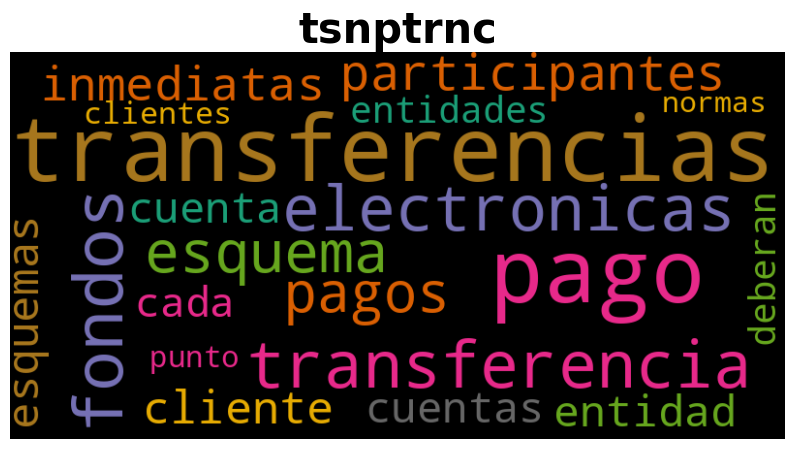

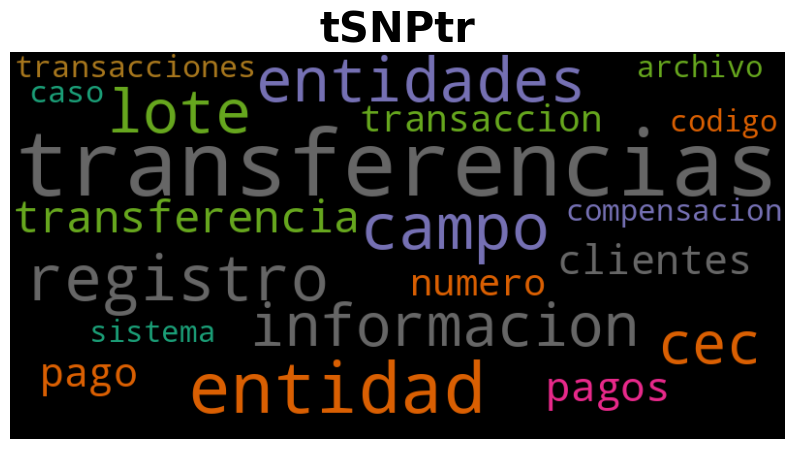

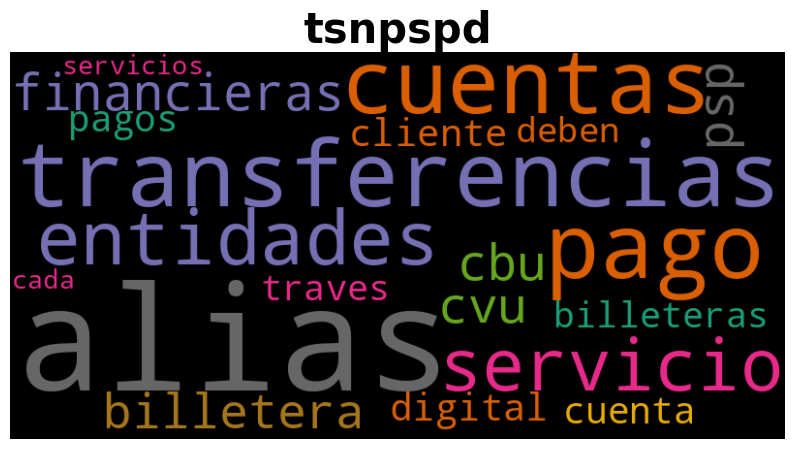

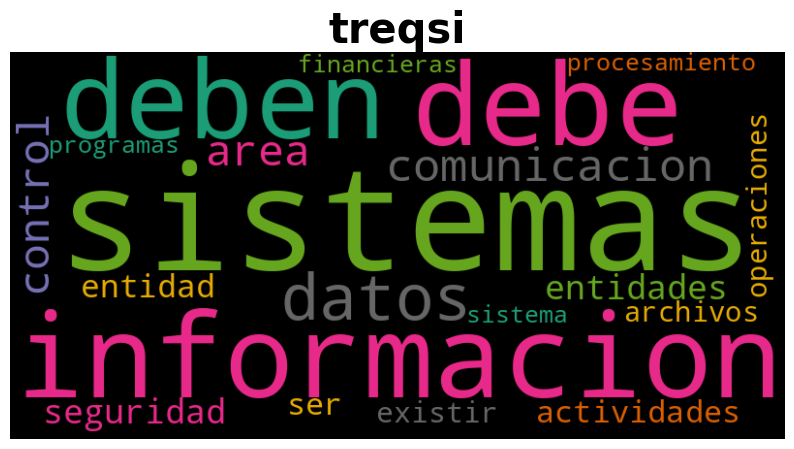

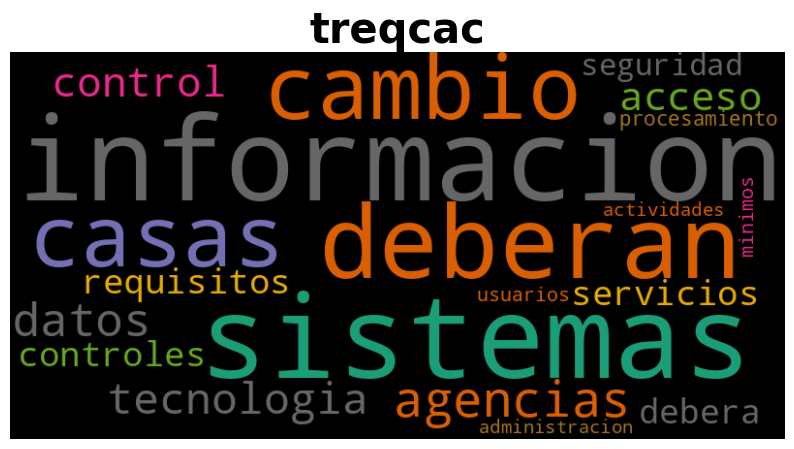

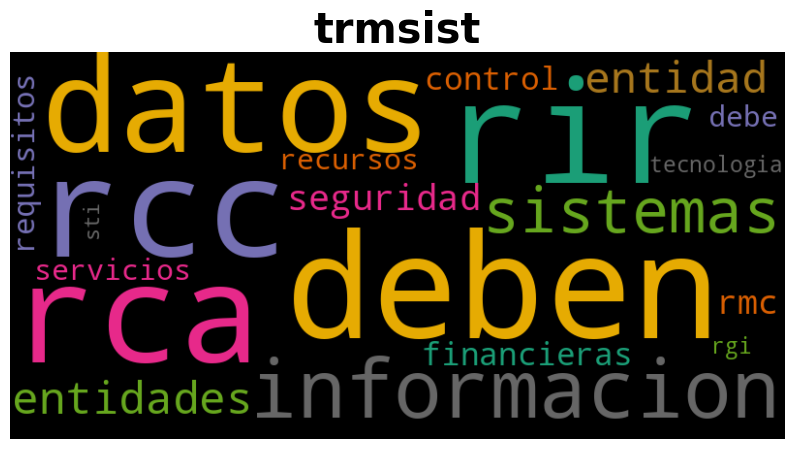

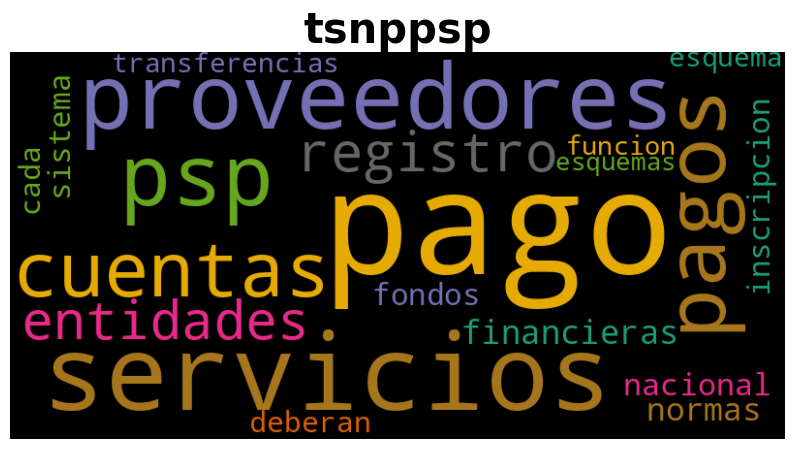

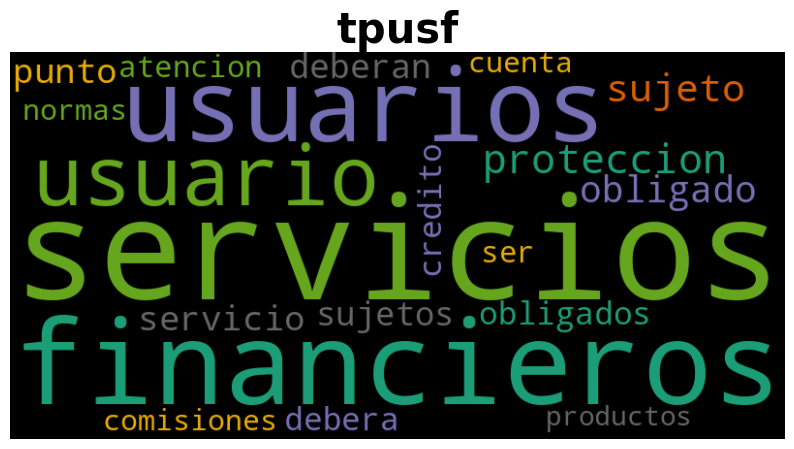

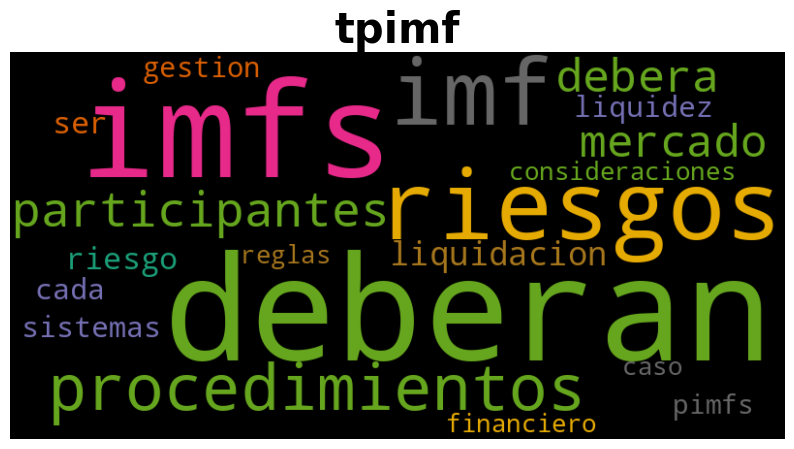

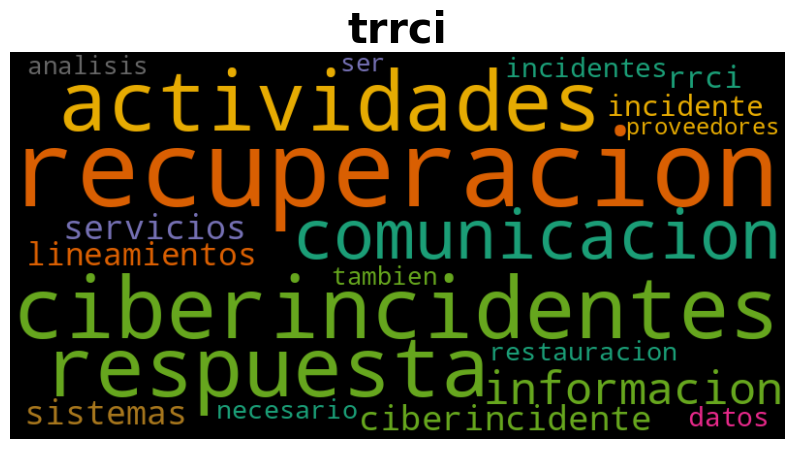

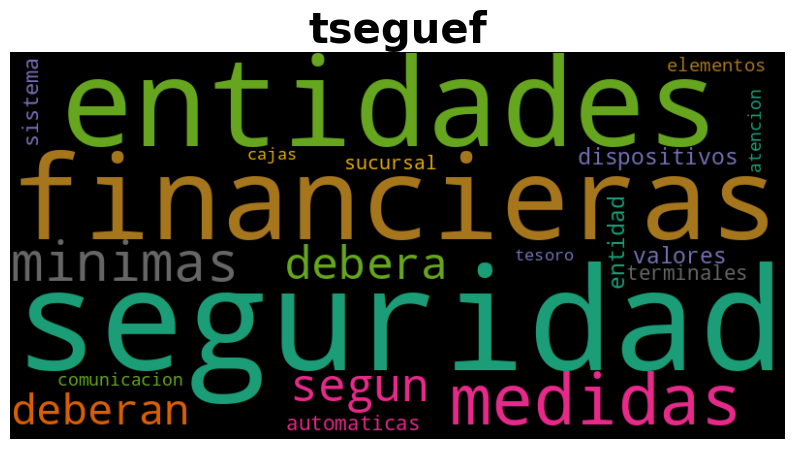

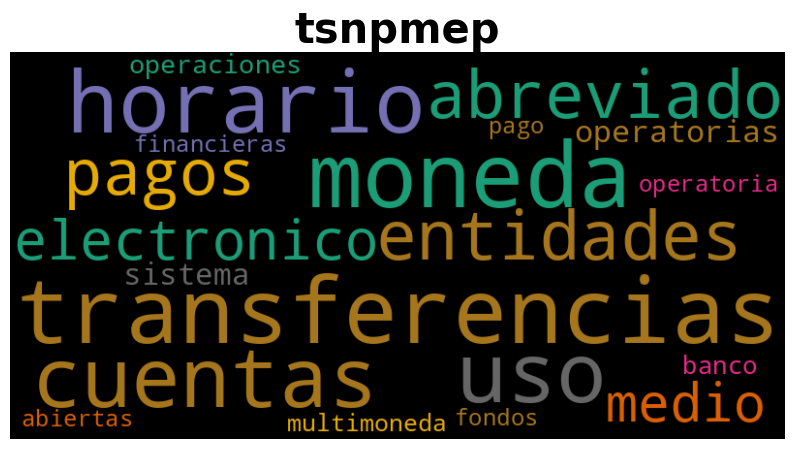

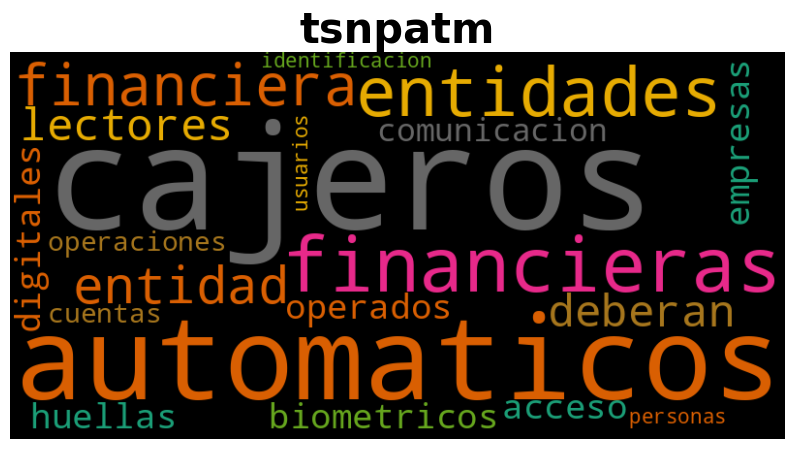

In [ ]:
# Funcion genera wordClouds


def filtroNorma(nombre):
 # for i in dfs:
  filtro = dftextos3[dftextos3.Archivo==nombre]
  dataf = dict(zip(filtro['Palabra'].tolist(),filtro['Frecuencia'].tolist()))
  wc = WordCloud(width=800, height=400, max_words=200, colormap="Dark2",max_font_size=150).generate_from_frequencies(dataf)
  plt.figure(figsize=(10, 10))
  plt.title(nombre, fontsize = 30,fontweight="bold")
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()
  return 

print(dfs1)

for i in dfs1:
 filtroNorma(i)


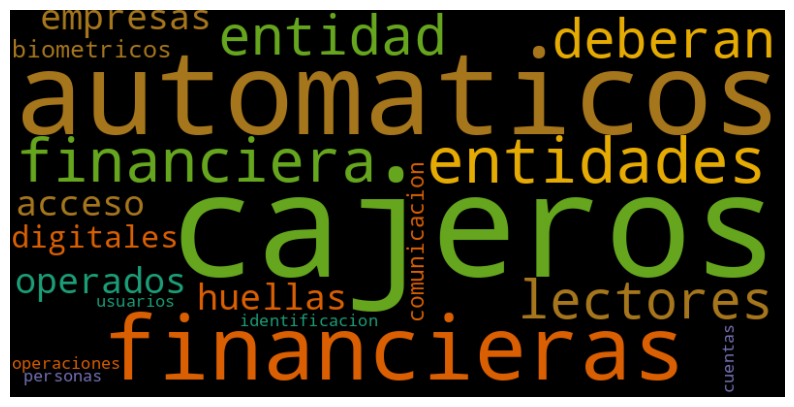

In [ ]:
data = dict(zip(tsnpatm['Palabra'].tolist(),tsnpatm['Frecuencia'].tolist()))
  #exec(f"{cadena1} = pd.DataFrame(doc_nltk_fq1.most_common(20), columns=['Palabra', 'Frecuencia'])")
wc = WordCloud(width=800, height=400, max_words=200, colormap="Dark2",max_font_size=150).generate_from_frequencies(data)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


# Stanza

In [ ]:
# Check directorio de trabajo
! pwd
! cd ./tfi_itba
! ls
%cd tfi_itba

/content
chequeo.txt  dftextos2P.csv  sample_data  tfi_itba
/content/tfi_itba


In [ ]:
#doc_stanza1 = " ".join(filtra_sentence2) 
import torch
archivo = './Fuentes/es_ancora_lemmatizer.pt'
#modelo = torch.load('es_ancora_lemmatizer.pt', map_location='cpu')
modelo = torch.load(archivo, map_location='cpu')
word_dict, compos_dict = modelo['dicts']
compos_dict[('rmc','NOUN')] = 'rmc'
word_dict['rmc'] = 'rmc'
compos_dict[('imf','NOUN')] = 'imf'
word_dict['imf'] = 'imf'
compos_dict[('imfs','NOUN')] = 'imf'
word_dict['imfs'] = 'imf'
compos_dict[('cimpra','NOUN')] = 'cimpra'
word_dict['cimpra'] = 'cimpra'
compos_dict[('traves','NOUN')] = 'traves'
word_dict['traves'] = 'traves'
compos_dict[('contraseñas','NOUN')] = 'contraseña'
word_dict['contraseñas'] = 'contraseña'
compos_dict[('dia','NOUN')] = 'dia'
word_dict['dia'] = 'dia'
compos_dict[('debera','VERB')] = 'deber'
word_dict['debera'] = 'deber'
compos_dict[('deben','VERB')] = 'deber'
word_dict['deben'] = 'deber'
compos_dict[('deberan','VERB')] = 'deber'
word_dict['deberan'] = 'deber'
compos_dict[('mtm','NOUN')] = 'mtm'
word_dict['mtm'] = 'mtm'
compos_dict[('gtia','NOUN')] = 'gtia'
word_dict['gtia'] = 'gtia'
compos_dict[('cta','NOUN')] = 'cta'
word_dict['cta'] = 'cta'
torch.save(modelo,'./Fuentes/modelogp.pt')



In [ ]:
dftextos['TLematizado'] = dftextos['T.Tokenizado s/ StopWords'].apply(lematizado)
dftextos

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package               |
-------------------------------------
| tokenize  | ancora                |
| lemma     | ./Fuentes/modelogp.pt |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


,Area,Archivo,Texto,Texto Limpio,T.Tokenizado,T.Tokenizado s/ StopWords,TLematizado
0,SGMP,t-snp-tr-nc,SISTEMA NACIONAL DE PAGOS \n– TRANSFERENCIAS ...,SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS NORMA...,"[SISTEMA, NACIONAL, DE, PAGOS, TRANSFERENCIAS,...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
1,SGMP,t-SNP-tr,SISTEMA NACIONAL DE PAGOS – \nTRANSFERENCIAS\n...,SISTEMA NACIONAL DE PAGOS TRANSFERENCIAS Ultim...,"[SISTEMA, NACIONAL, DE, PAGOS, TRANSFERENCIAS,...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
2,SGMP,t-snp-spd,SISTEMA NACIONAL DE PAGOS –\nSERVICIOS DE PAGO...,SISTEMA NACIONAL DE PAGOS SERVICIOS DE PAGO Ul...,"[SISTEMA, NACIONAL, DE, PAGOS, SERVICIOS, DE, ...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
3,SGR,t-req-si,REQUISITOS OPERATIVOS MÍNIMOS \nDEL ÁREA DE S...,REQUISITOS OPERATIVOS MINIMOS DEL AREA DE SIST...,"[REQUISITOS, OPERATIVOS, MINIMOS, DEL, AREA, D...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
4,SGR,t-reqcac,REQUISITOS OPERATIVOS MÍNIMOS DE \nTECNOLOGÍA ...,REQUISITOS OPERATIVOS MINIMOS DE TECNOLOGIA Y ...,"[REQUISITOS, OPERATIVOS, MINIMOS, DE, TECNOLOG...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
5,SGR,t-rmsist,"REQUISITOS MÍNIMOS DE GESTIÓN, \nIMPLEMENTACIÓ...",REQUISITOS MINIMOS DE GESTION IMPLEMENTACION Y...,"[REQUISITOS, MINIMOS, DE, GESTION, IMPLEMENTAC...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
6,SGMP,t-snp-psp,PROVEEDORES DE SERVICIOS DE PAGO \n\n-Última c...,PROVEEDORES DE SERVICIOS DE PAGO Ultima comuni...,"[PROVEEDORES, DE, SERVICIOS, DE, PAGO, Ultima,...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
7,SGR,t-pusf,PROTECCIÓN DE LOS USUARIOS DE \nSERVICIOS FINA...,PROTECCION DE LOS USUARIOS DE SERVICIOS FINANC...,"[PROTECCION, DE, LOS, USUARIOS, DE, SERVICIOS,...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
8,SGMP,t-pimf,PRINCIPIOS PARA LAS INFRAESTRUCTURAS DEL \nMER...,PRINCIPIOS PARA LAS INFRAESTRUCTURAS DEL MERCA...,"[PRINCIPIOS, PARA, LAS, INFRAESTRUCTURAS, DEL,...","[ultima, comunicacion, incorporada, texto, ord...","[ultimo, comunicacion, incorporado, texto, ord..."
9,SGMP,t-rrci,\n\n \n\n \n \nLINEAMIENTOS PARA LA RESPUESTA...,LINEAMIENTOS PARA LA RESPUESTA Y RECUPERACION ...,"[LINEAMIENTOS, PARA, LA, RESPUESTA, Y, RECUPER...","[rrci, ultima, comunicacion, incorporada, text...","[rrci, ultimo, comunicacion, incorporado, text..."


In [ ]:
dftextos2[['TL','TLU']] = dftextos['TLematizado'].apply(total2)
#dftextos2['T.Tokenizado s/ StopWords']
dftextos2b = dftextos2

In [ ]:
dftextos2b

,Area,Archivo,T.Tokenizado,T.Tokenizado s/ StopWords,T3,TU3,T,TU,TL,TLU
0,SGMP,t-snp-tr-nc,"[SISTEMA, NACIONAL, DE, PAGOS, TRANSFERENCIAS,...","[ultima, comunicacion, incorporada, texto, ord...",15,3,3979,1151,3979,903
1,SGMP,t-SNP-tr,"[SISTEMA, NACIONAL, DE, PAGOS, TRANSFERENCIAS,...","[ultima, comunicacion, incorporada, texto, ord...",40,17,7483,1444,7485,1119
2,SGMP,t-snp-spd,"[SISTEMA, NACIONAL, DE, PAGOS, SERVICIOS, DE, ...","[ultima, comunicacion, incorporada, texto, ord...",17,6,2122,768,2124,635
3,SGR,t-req-si,"[REQUISITOS, OPERATIVOS, MINIMOS, DEL, AREA, D...","[ultima, comunicacion, incorporada, texto, ord...",3,3,2399,929,2399,762
4,SGR,t-reqcac,"[REQUISITOS, OPERATIVOS, MINIMOS, DE, TECNOLOG...","[ultima, comunicacion, incorporada, texto, ord...",3,3,1704,748,1704,625
5,SGR,t-rmsist,"[REQUISITOS, MINIMOS, DE, GESTION, IMPLEMENTAC...","[ultima, comunicacion, incorporada, texto, ord...",235,22,17086,2844,17086,2125
6,SGMP,t-snp-psp,"[PROVEEDORES, DE, SERVICIOS, DE, PAGO, Ultima,...","[ultima, comunicacion, incorporada, texto, ord...",12,4,1832,780,1832,648
7,SGR,t-pusf,"[PROTECCION, DE, LOS, USUARIOS, DE, SERVICIOS,...","[ultima, comunicacion, incorporada, texto, ord...",14,4,6706,1882,6707,1456
8,SGMP,t-pimf,"[PRINCIPIOS, PARA, LAS, INFRAESTRUCTURAS, DEL,...","[ultima, comunicacion, incorporada, texto, ord...",13,6,4780,1510,4780,1179
9,SGMP,t-rrci,"[LINEAMIENTOS, PARA, LA, RESPUESTA, Y, RECUPER...","[rrci, ultima, comunicacion, incorporada, text...",2,1,1964,859,1964,709


In [ ]:
%cd content/
# Check directorio de trabajo
! pwd
! ls
dftextos2b.to_csv('./dftextos2PL.csv', encoding = 'utf-8-sig')

[Errno 2] No such file or directory: 'content/'
/content
/content
chequeo.txt  dftextos2P.csv  dftextos2PL.csv  sample_data  tfi_itba


In [ ]:
dfsl1 = []
for i in range(len(dftextos2)):
    #print(dftextos2.iloc[i]['Archivo'])
    #data1 = clean2(dftextos2.iloc[i]['Area'])
    # total_tl  = total de palabras del documento(archivo, norma) lematizado
    # igual a la columna TL del dataframe dftexto2 

    data1 = dftextos2.iloc[i]['Area']
    data = clean2(dftextos2.iloc[i]['Archivo']) #Se elimina caracter "-" del nombre del archivo 
    texto = dftextos.iloc[i]['TLematizado']
    total_tl = dftextos2.iloc[i]['TL']
    doc_nltk_fq1 = nltk.FreqDist(wo for wo in texto if wo.lower() not in stopwords)   
    cadena1la = f"l{data}"
    print(cadena1la)
    dfs1.append(cadena1la)
    exec(f"{cadena1la} = pd.DataFrame(doc_nltk_fq1.most_common(20), columns=['Palabra', 'Frecuencia'])")
    exec(f"{cadena1la}['Area'] = data1")
    exec(f"{cadena1la}['Archivo'] = data")
    exec(f"{cadena1la}['TL'] = total_tl")


ltsnptrnc
ltSNPtr
ltsnpspd
ltreqsi
ltreqcac
ltrmsist
ltsnppsp
ltpusf
ltpimf
ltrrci
ltseguef
ltsnpmep
ltsnpatm


In [ ]:
dftextos4 = pd.concat((ltsnptrnc,ltSNPtr,ltsnpspd,ltreqsi,ltreqcac,ltrmsist,
                 ltsnppsp, ltpusf, ltpimf,ltrrci, ltseguef, ltsnpmep,
                  ltsnpatm))

In [ ]:
dftextos4

,Palabra,Frecuencia,Area,Archivo,TL
0,transferencia,190,SGMP,tsnptrnc,3979
1,pago,169,SGMP,tsnptrnc,3979
2,esquema,84,SGMP,tsnptrnc,3979
3,cuenta,70,SGMP,tsnptrnc,3979
4,fondo,66,SGMP,tsnptrnc,3979
...,...,...,...,...,...
15,servicio,7,SGMP,tsnpatm,594
16,norma,6,SGMP,tsnpatm,594
17,identificacion,6,SGMP,tsnpatm,594
18,persona,6,SGMP,tsnpatm,594


In [ ]:
dftextos4 = dftextos4[['Area','Archivo','Palabra','Frecuencia','TL']]
dftextos4

,Area,Archivo,Palabra,Frecuencia,TL
0,SGMP,tsnptrnc,transferencia,190,3979
1,SGMP,tsnptrnc,pago,169,3979
2,SGMP,tsnptrnc,esquema,84,3979
3,SGMP,tsnptrnc,cuenta,70,3979
4,SGMP,tsnptrnc,fondo,66,3979
...,...,...,...,...,...
15,SGMP,tsnpatm,servicio,7,594
16,SGMP,tsnpatm,norma,6,594
17,SGMP,tsnpatm,identificacion,6,594
18,SGMP,tsnpatm,persona,6,594


In [ ]:
# Se agrega TD (total de documentos del corpus ..sale de la cantidad de filas 
# del Dataframe dftextos2 
dftextos4['TD'] = dftextos2.shape[0] 
dftextos4

<ipython-input-61-6ae689877dba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftextos4['TD'] = dftextos2.shape[0]


,Area,Archivo,Palabra,Frecuencia,TL,TD
0,SGMP,tsnptrnc,transferencia,190,3979,13
1,SGMP,tsnptrnc,pago,169,3979,13
2,SGMP,tsnptrnc,esquema,84,3979,13
3,SGMP,tsnptrnc,cuenta,70,3979,13
4,SGMP,tsnptrnc,fondo,66,3979,13
...,...,...,...,...,...,...
15,SGMP,tsnpatm,servicio,7,594,13
16,SGMP,tsnpatm,norma,6,594,13
17,SGMP,tsnpatm,identificacion,6,594,13
18,SGMP,tsnpatm,persona,6,594,13


# Visualizaciones - 20 Palabras más Frecuentes

In [ ]:
tsnptrnc

,Palabra,Frecuencia,Area,Archivo
0,transferencias,129,SGMP,tsnptrnc
1,pago,124,SGMP,tsnptrnc
2,fondos,66,SGMP,tsnptrnc
3,transferencia,61,SGMP,tsnptrnc
4,electronicas,57,SGMP,tsnptrnc
5,esquema,49,SGMP,tsnptrnc
6,pagos,45,SGMP,tsnptrnc
7,participantes,42,SGMP,tsnptrnc
8,inmediatas,39,SGMP,tsnptrnc
9,cliente,36,SGMP,tsnptrnc


In [ ]:
##Visualizaciones 20 Palabras mas Frecuentes
ltsnptrnc

,Palabra,Frecuencia,Area,Archivo,TL
0,transferencia,190,SGMP,tsnptrnc,3979
1,pago,169,SGMP,tsnptrnc,3979
2,esquema,84,SGMP,tsnptrnc,3979
3,cuenta,70,SGMP,tsnptrnc,3979
4,fondo,66,SGMP,tsnptrnc,3979
5,entidad,66,SGMP,tsnptrnc,3979
6,cliente,65,SGMP,tsnptrnc,3979
7,deber,60,SGMP,tsnptrnc,3979
8,electronica,57,SGMP,tsnptrnc,3979
9,participante,47,SGMP,tsnptrnc,3979


In [ ]:
ltsnptrnc = ltsnptrnc.sort_values('Frecuencia',ascending=True)
ltSNPtr = ltSNPtr.sort_values('Frecuencia',ascending=True)
ltsnpspd = ltsnpspd.sort_values('Frecuencia',ascending=True)
ltreqsi  = ltreqsi.sort_values('Frecuencia',ascending=True)
ltreqcac  = ltreqcac.sort_values('Frecuencia',ascending=True)
ltsnppsp = ltsnppsp.sort_values('Frecuencia',ascending=True) 
ltpimf = ltpimf.sort_values('Frecuencia',ascending=True)
ltrmsist = ltrmsist.sort_values('Frecuencia',ascending=True)
ltpusf = ltpusf.sort_values('Frecuencia',ascending=True)
ltrrci = ltrrci.sort_values('Frecuencia',ascending=True)
ltseguef = ltseguef.sort_values('Frecuencia',ascending=True)
ltsnpmep = ltsnpmep.sort_values('Frecuencia',ascending=True)
ltsnpatm = ltsnpatm.sort_values('Frecuencia',ascending=True)


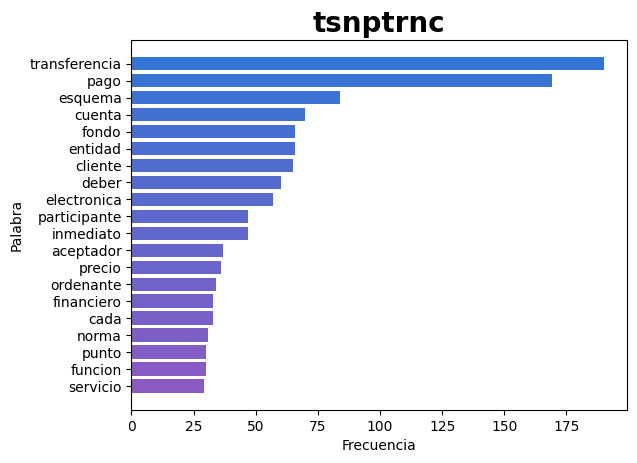

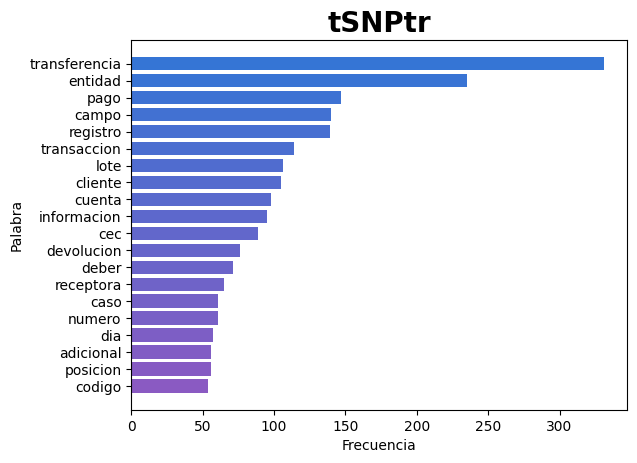

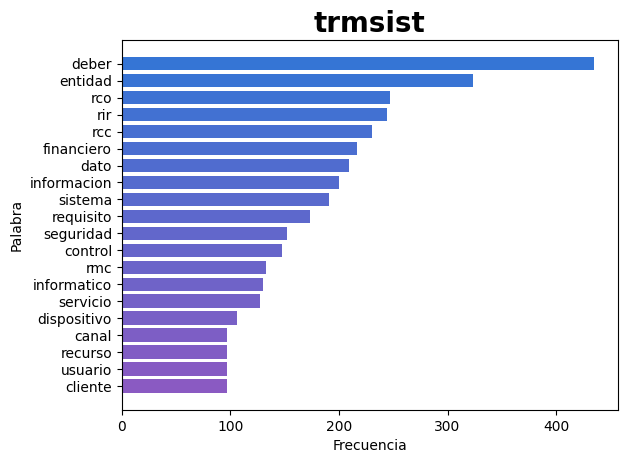

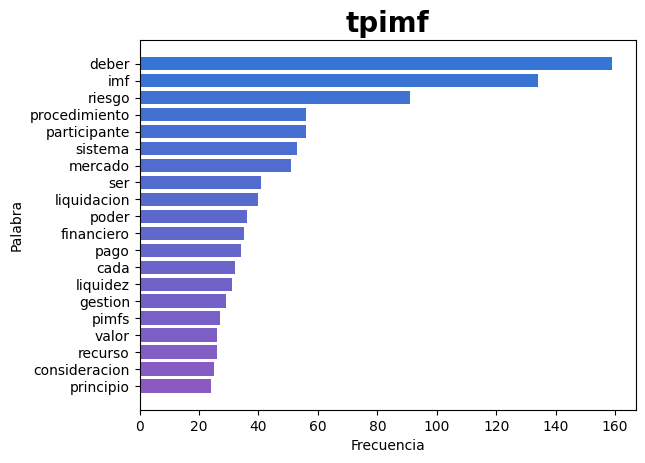

In [ ]:
import numpy as np
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


color1 = "#8A5AC2"
color2 = "#3575D5"

plt.barh(ltsnptrnc['Palabra'],ltsnptrnc['Frecuencia'], color = get_color_gradient(color1, color2, len(ltsnptrnc)))

plt.title('tsnptrnc', fontsize = 20,fontweight="bold")
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')


plt.show()
  #return 
plt.barh(ltSNPtr['Palabra'],ltSNPtr['Frecuencia'], color = get_color_gradient(color1, color2, len(ltSNPtr)))
plt.title('tSNPtr', fontsize = 20,fontweight="bold")
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
  
plt.show()
 
plt.barh(ltrmsist['Palabra'],ltrmsist['Frecuencia'], color = get_color_gradient(color1, color2, len(ltrmsist)))
plt.title('trmsist', fontsize = 20,fontweight="bold")
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
  
plt.show()

plt.barh(ltpimf['Palabra'],ltpimf['Frecuencia'], color = get_color_gradient(color1, color2, len(ltpimf)))
plt.title('tpimf', fontsize = 20,fontweight="bold")
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
  
plt.show()


In [ ]:
#%cd tfi_itba
dftextos4.to_csv('./dftextos4.csv', encoding = 'utf-8-sig') 


In [ ]:
dftextos4 

,Area,Archivo,Palabra,Frecuencia,TL,TD
0,SGMP,tsnptrnc,transferencia,190,3979,13
1,SGMP,tsnptrnc,pago,169,3979,13
2,SGMP,tsnptrnc,esquema,84,3979,13
3,SGMP,tsnptrnc,cuenta,70,3979,13
4,SGMP,tsnptrnc,fondo,66,3979,13
...,...,...,...,...,...,...
15,SGMP,tsnpatm,servicio,7,594,13
16,SGMP,tsnpatm,norma,6,594,13
17,SGMP,tsnpatm,identificacion,6,594,13
18,SGMP,tsnpatm,persona,6,594,13


id	token	count	total_count	tf

8158	3.546906e+17	bar	1	20	0.

8159	3.546906e+17	barman	1	20	0.05

8164	3.546906e+17	says	1	20	0.05


**id** = norma

**token** = palabra

**count** = frecuencia cantidad de veces q aparece la palabra en la norma

**total_count** = cantidad de palabras de la norma TL (cantidad de palabras lematizada

**tf** = count / total_count 

Frecuencia de Terminos = la cantidad de veces q aparece la palabra en una norma dividido la cantidad de palabras en la norma 


In [ ]:
# *****************************
# Matriz de Frecuencia TF
# *****************************

TF = dftextos4.copy()
TF['TF'] = TF['Frecuencia'] / TF['TL']
TF


,Area,Archivo,Palabra,Frecuencia,TL,TD,TF
0,SGMP,tsnptrnc,transferencia,190,3979,13,0.047751
1,SGMP,tsnptrnc,pago,169,3979,13,0.042473
2,SGMP,tsnptrnc,esquema,84,3979,13,0.021111
3,SGMP,tsnptrnc,cuenta,70,3979,13,0.017592
4,SGMP,tsnptrnc,fondo,66,3979,13,0.016587
...,...,...,...,...,...,...,...
15,SGMP,tsnpatm,servicio,7,594,13,0.011785
16,SGMP,tsnpatm,norma,6,594,13,0.010101
17,SGMP,tsnpatm,identificacion,6,594,13,0.010101
18,SGMP,tsnpatm,persona,6,594,13,0.010101


In [ ]:
# *****************************
# Matriz Inversa de Documentos IDF
# *****************************

IDF = dftextos4.copy()
# calculo la cantidad de documentos/normas/regulaciones del corpus 
# en los que aparece cada palabra o termino 
IDF = IDF.groupby(['Palabra', 'Archivo'])['Palabra'].agg(['count']).reset_index()
IDF['tdocu'] = IDF.groupby('Palabra')['count'].transform(sum)
IDF3 = IDF.head(10)
IDF3

,Palabra,Archivo,count,tdocu
0,abierto,tsnpmep,1,1
1,abreviado,tsnpmep,1,1
2,acceso,treqcac,1,3
3,acceso,treqsi,1,3
4,acceso,tsnpatm,1,3
5,aceptador,tsnptrnc,1,1
6,actividad,treqsi,1,2
7,actividad,trrci,1,2
8,acuerdo,trrci,1,1
9,adecuado,treqcac,1,1


In [ ]:
# continuacion IDF
import numpy as np

#IDF['IDF'] = np.log(dftextos2.shape[0] / IDF['tdocu'])
IDF['IDF'] = np.log((dftextos2.shape[0] + 1) / (IDF['tdocu'] + 1)) +1
IDF = IDF[['Palabra','tdocu','IDF']].drop_duplicates()
IDF.sort_values(by='IDF').head(10)
lista_tokens = IDF['Palabra'].tolist()
lista_docs = (dftextos2['Archivo'].apply(clean2).tolist())
#el valor IDF para una palabra permanece igual en todos los documentos, 
#ya que depende del número total de documentos. Por otro lado, los valores de TF de una 
#palabra difieren de un documento a otro

In [ ]:
# TF - ITF 
# ***********************

TF_IDF = pd.merge(left=TF, right=IDF, on='Palabra')
TF_IDF['TF_IDF'] = TF_IDF['TF'] * TF_IDF['IDF']
#TF_IDF.sort_values(by='Archivo').head(10)
TF_IDF.sort_values(['Frecuencia','Archivo','tdocu','Palabra'], ascending = False).head(30)




,Area,Archivo,Palabra,Frecuencia,TL,TD,TF,tdocu,IDF,TF_IDF
42,SGR,trmsist,deber,435,17086,13,0.025459,12,1.074108,0.027346
1,SGMP,tSNPtr,transferencia,331,7485,13,0.044222,5,1.847298,0.081691
27,SGR,trmsist,entidad,323,17086,13,0.018904,10,1.241162,0.023463
84,SGR,tpusf,servicio,286,6707,13,0.042642,8,1.441833,0.061483
181,SGR,tpusf,usuario,254,6707,13,0.037871,4,2.029619,0.076863
184,SGR,trmsist,rco,247,17086,13,0.014456,1,2.945910,0.042587
61,SGR,tpusf,financiero,245,6707,13,0.036529,10,1.241162,0.045338
185,SGR,trmsist,rir,244,17086,13,0.014281,1,2.945910,0.042070
24,SGMP,tSNPtr,entidad,235,7485,13,0.031396,10,1.241162,0.038968
186,SGR,trmsist,rcc,230,17086,13,0.013461,1,2.945910,0.039656


In [ ]:
Vector = TF_IDF.drop(['Area','Frecuencia','TL','TD','TF','tdocu','IDF'], axis = 1)
Vector

,Archivo,Palabra,TF_IDF
0,tsnptrnc,transferencia,0.088210
1,tSNPtr,transferencia,0.081691
2,tsnpspd,transferencia,0.026092
3,tsnppsp,transferencia,0.014117
4,tsnpmep,transferencia,0.045977
...,...,...,...
255,tsnpatm,huella,0.044635
256,tsnpatm,lector,0.039676
257,tsnpatm,operar,0.034716
258,tsnpatm,biometrico,0.034716


In [ ]:
datos = []
#Vector2 = pd.DataFrame(lista_docs, columns= lista_tokens)

Vector2 = pd.DataFrame(datos, columns=lista_tokens, index=lista_docs)
Vector2

,abierto,abreviado,acceso,aceptador,actividad,acuerdo,adecuado,adicional,agencia,alias,...,sujeto,tecnologia,terminal,tesoro,transaccion,transferencia,traves,uso,usuario,valor
tsnptrnc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tSNPtr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tsnpspd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treqsi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treqcac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trmsist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tsnppsp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpusf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpimf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trrci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Vector = pd.pivot_table(Vector, columns='Archivo', values=columnas).reset_index()
#tf_idf_model = np.transpose(Vector)  

for i in range(len(Vector)):
  #cod = test1_df.loc[i:i, 'code'].to_string(index=False)
  cod = Vector['Palabra'][i]
  #cod = test1_df.loc[i:i, 'code']
  s = Vector.loc[i:i, 'Archivo'].to_string(index=False)
#  s = test1_df.loc[i:i, 'cant'].to_string(index=False)
  c = Vector.loc[i:i, 'TF_IDF'].to_string(index=False)
  print(cod,'',s,'',c)

  #test2_df.loc[cod,s] = c
  Vector2.loc[s,cod] = c

#df.loc['cobra', 'shield']


transferencia  tsnptrnc  0.08821
transferencia  tSNPtr  0.081691
transferencia  tsnpspd  0.026092
transferencia  tsnppsp  0.014117
transferencia  tsnpmep  0.045977
pago  tsnptrnc  0.071913
pago  tSNPtr  0.033252
pago  tsnpspd  0.034277
pago  tsnppsp  0.109981
pago  tpimf  0.012043
pago  tsnpmep  0.040206
esquema  tsnptrnc  0.053631
esquema  tsnppsp  0.031894
cuenta  tsnptrnc  0.027437
cuenta  tSNPtr  0.02042
cuenta  tsnpspd  0.03084
cuenta  tsnppsp  0.023837
cuenta  tpusf  0.011162
cuenta  tsnpmep  0.038223
cuenta  tsnpatm  0.023631
fondo  tsnptrnc  0.037367
fondo  tsnppsp  0.018445
fondo  tsnpmep  0.01745
entidad  tsnptrnc  0.020587
entidad  tSNPtr  0.038968
entidad  tsnpspd  0.022205
entidad  treqsi  0.021212
entidad  trmsist  0.023463
entidad  tsnppsp  0.01355
entidad  tpusf  0.007032
entidad  tseguef  0.040652
entidad  tsnpmep  0.028842
entidad  tsnpatm  0.0397
cliente  tsnptrnc  0.033155
cliente  tSNPtr  0.028472
cliente  tsnpspd  0.026756
cliente  trmsist  0.011522
deber  tsnptrn

In [ ]:

#Vector2.to_csv('./Vector2.csv', encoding = 'utf-8-sig') 
Vector2 = Vector2.fillna(0)
Vector2

,abierto,abreviado,acceso,aceptador,actividad,acuerdo,adecuado,adicional,agencia,alias,...,sujeto,tecnologia,terminal,tesoro,transaccion,transferencia,traves,uso,usuario,valor
tsnptrnc,0,0,0,0.027393,0,0,0,0,0,0,...,0,0,0,0,0,0.08821,0,0,0,0
tSNPtr,0,0,0,0,0,0,0,0.02204,0,0,...,0,0,0,0,0.044868,0.081691,0,0,0,0
tsnpspd,0,0,0,0,0,0,0,0,0,0.055479,...,0,0,0,0,0,0.026092,0.022191,0,0,0
treqsi,0,0,0.015025,0,0.023297,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
treqcac,0,0,0.026441,0,0,0,0.025932,0,0.046678,0,...,0,0.034576,0,0,0,0,0,0,0.016675,0
trmsist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.011522,0
tsnppsp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.014117,0,0,0,0
tpusf,0,0,0,0,0,0,0,0,0,0,...,0.050951,0,0,0,0,0,0,0,0.076863,0
tpimf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.013818
trrci,0,0,0,0,0.034925,0.022499,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
